In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from scipy.interpolate import interp1d
%matplotlib inline

In [3]:
df = pd.read_csv('MacbethColorChecker.csv')
light = pd.read_csv('HPS_MCB.csv')
XYZ = pd.read_csv('XYZ_Color_Function.csv')[3:84]

In [4]:
light = light/np.amax(light)

C:\Users\robin\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


In [5]:
df.drop('Unnamed: 25', axis=1, inplace=True)
df.drop('Patch Numbers', axis=1, inplace=True)
df.drop('wavelength', axis=1, inplace=True)

wavelength = np.arange(380, 780., .1)
wavelength = np.asarray(wavelength)
wave = range(380, 785, 5)
wave = np.asarray(wave)

In [6]:
XYZ

,Wavelength,Z_Bar,Y_Bar,X_Bar
3,375,0.000742,0.000022,0.003486
4,380,0.001368,0.000039,0.006450
5,385,0.002236,0.000064,0.010550
6,390,0.004243,0.000120,0.020050
7,395,0.007650,0.000217,0.036210
...,...,...,...,...
79,755,0.000235,0.000085,0.000000
80,760,0.000166,0.000060,0.000000
81,765,0.000117,0.000042,0.000000
82,770,0.000083,0.000030,0.000000


In [7]:
light.drop('wavelength', axis=1, inplace=True)

In [8]:
XYZ = XYZ.rename(columns = {XYZ.columns[0]:'wave', XYZ.columns[1]:'X', XYZ.columns[2]:'Y', XYZ.columns[3]:'Z'})
XYZ.reset_index(drop=True, inplace = True)
X_Bar, Y_Bar, Z_Bar = XYZ['X'], XYZ['Y'], XYZ['Z']
XYZ.drop('wave', axis=1, inplace=True)
X_Bar=pd.DataFrame(X_Bar)
Y_Bar=pd.DataFrame(Y_Bar)
Z_Bar=pd.DataFrame(Z_Bar)

In [9]:
light

,1
0,0.003864
1,0.003377
2,0.002744
3,0.002854
4,0.002981
...,...
3995,0.013004
3996,0.013609
3997,0.014189
3998,0.014757


In [8]:
df.head()

,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
0,0.048,0.103,0.113,0.048,0.123,0.110,0.053,0.099,0.096,0.101,...,0.052,0.054,0.118,0.093,0.153,0.150,0.138,0.113,0.074,0.032
1,0.051,0.120,0.138,0.049,0.152,0.133,0.054,0.120,0.108,0.115,...,0.052,0.053,0.142,0.110,0.189,0.184,0.167,0.131,0.079,0.033
2,0.055,0.141,0.174,0.049,0.197,0.167,0.054,0.150,0.123,0.135,...,0.052,0.054,0.179,0.134,0.245,0.235,0.206,0.150,0.084,0.033
3,0.060,0.163,0.219,0.049,0.258,0.208,0.054,0.189,0.135,0.157,...,0.052,0.053,0.228,0.164,0.319,0.299,0.249,0.169,0.088,0.034
4,0.065,0.182,0.266,0.050,0.328,0.252,0.054,0.231,0.144,0.177,...,0.051,0.053,0.283,0.195,0.409,0.372,0.289,0.183,0.091,0.035


In [9]:
df = np.transpose(np.asarray(df.values.tolist()))
df

array([[0.048, 0.051, 0.055, ..., 0.448, 0.432, 0.421],
       [0.103, 0.12 , 0.141, ..., 0.771, 0.747, 0.734],
       [0.113, 0.138, 0.174, ..., 0.11 , 0.115, 0.12 ],
       ...,
       [0.113, 0.131, 0.15 , ..., 0.184, 0.184, 0.183],
       [0.074, 0.079, 0.084, ..., 0.083, 0.083, 0.083],
       [0.032, 0.033, 0.033, ..., 0.032, 0.032, 0.032]])

In [10]:
X_Bar = np.asarray(X_Bar['X'].tolist())
Y_Bar = np.asarray(Y_Bar['Y'].tolist())
Z_Bar = np.asarray(Z_Bar['Z'].tolist())

light = np.asarray(light['1'].tolist())

In [11]:
F = interp1d(wave, X_Bar, kind='linear')
G = interp1d(wave, Y_Bar, kind='linear')
H = interp1d(wave, Z_Bar, kind='linear')

I = interp1d(wavelength, light, kind='linear')

J0 = interp1d(wave, df[0], kind='linear')
J1 = interp1d(wave, df[1], kind='linear')
J2 = interp1d(wave, df[2], kind='linear')
J3 = interp1d(wave, df[3], kind='linear')
J4 = interp1d(wave, df[4], kind='linear')
J5 = interp1d(wave, df[5], kind='linear')
J6 = interp1d(wave, df[6], kind='linear')
J7 = interp1d(wave, df[7], kind='linear')
J8 = interp1d(wave, df[8], kind='linear')
J9 = interp1d(wave, df[9], kind='linear')
J10 = interp1d(wave, df[10], kind='linear')
J11 = interp1d(wave, df[11], kind='linear')
J12 = interp1d(wave, df[12], kind='linear')
J13 = interp1d(wave, df[13], kind='linear')
J14 = interp1d(wave, df[14], kind='linear')
J15 = interp1d(wave, df[15], kind='linear')
J16 = interp1d(wave, df[16], kind='linear')
J17 = interp1d(wave, df[17], kind='linear')
J18 = interp1d(wave, df[18], kind='linear')
J19 = interp1d(wave, df[19], kind='linear')
J20 = interp1d(wave, df[20], kind='linear')
J21 = interp1d(wave, df[21], kind='linear')
J22 = interp1d(wave, df[22], kind='linear')
J23 = interp1d(wave, df[23], kind='linear')

In [12]:
X_Bar, Y_Bar, Z_Bar = F(wavelength), G(wavelength), H(wavelength)
light = I(wavelength)
df0, df1, df2, df3 = J0(wavelength), J1(wavelength), J2(wavelength), J3(wavelength)
df4, df5, df6, df7 = J4(wavelength), J5(wavelength), J6(wavelength), J7(wavelength)
df8, df9, df10, df11 = J8(wavelength), J9(wavelength), J10(wavelength), J11(wavelength)
df12, df13, df14, df15 = J12(wavelength), J13(wavelength), J14(wavelength), J15(wavelength)
df16, df17, df18, df19 = J16(wavelength), J17(wavelength), J18(wavelength), J19(wavelength)
df20, df21, df22, df23 = J20(wavelength), J21(wavelength), J22(wavelength), J23(wavelength)

X_Bar = pd.DataFrame(X_Bar)
Y_Bar = pd.DataFrame(Y_Bar)
Z_Bar = pd.DataFrame(Z_Bar)

light = pd.DataFrame(light)

df = np.concatenate(([df0],[df1],[df2],[df3],[df4],[df5],[df6],[df7],[df8],[df9],[df10],[df11],[df12],[df13],[df14],[df15],[df16],[df17],[df18],[df19],[df20],[df21],[df22],[df23]))

df = np.transpose(df)

df = pd.DataFrame(df)


In [13]:
X_light = pd.DataFrame(light.values*X_Bar.values, columns=light.columns, index=light.index)
Y_light = pd.DataFrame(light.values*Y_Bar.values, columns=light.columns, index=light.index)
Z_light = pd.DataFrame(light.values*Z_Bar.values, columns=light.columns, index=light.index)

In [14]:
X_light=X_light.sum()
Y_light=Y_light.sum()
Z_light=Z_light.sum()

Y = Y_light.tolist()[0]

In [15]:
Y

120.9233972182528

In [16]:
df_light = pd.DataFrame(df.values*light.values, columns=df.columns, index=df.index)

In [17]:
x_bar = pd.DataFrame(df_light.values*X_Bar.values, columns=df_light.columns, index=df_light.index)

y_bar = pd.DataFrame(df_light.values*Y_Bar.values, columns=df_light.columns, index=df_light.index)

z_bar = pd.DataFrame(df_light.values*Z_Bar.values, columns=df_light.columns, index=df_light.index)


In [18]:
x_bar = pd.DataFrame(x_bar.sum())/Y
y_bar = pd.DataFrame(y_bar.sum())/Y
z_bar = pd.DataFrame(z_bar.sum())/Y

x_bar.head(), y_bar.head(), z_bar.head()

(          0
 0  0.151795
 1  0.519149
 2  0.183116
 3  0.128504
 4  0.271279,
           0
 0  0.120808
 1  0.408681
 2  0.161825
 3  0.115696
 4  0.222788,
           0
 0  0.008287
 1  0.036881
 2  0.045847
 3  0.009523
 4  0.060130)

In [19]:
var_R = pd.DataFrame(x_bar*3.2406 + y_bar*-1.5372 + z_bar*-0.4986, columns=x_bar.columns, index=x_bar.index)
var_G = pd.DataFrame(x_bar*-0.9686 + y_bar*1.8758 + z_bar*0.0415, columns=x_bar.columns, index=x_bar.index)
var_B = pd.DataFrame(x_bar*0.0557 + y_bar*-0.2040 + z_bar*1.0570, columns=x_bar.columns, index=x_bar.index)

In [20]:
r,g,b = var_R.iloc[:,0].tolist(), var_G.iloc[:,0].tolist(), var_B.iloc[:,0].tolist()

In [21]:
r_cor, g_cor, b_cor = [], [], []

for i in range(len(r)):
    if r[i] > 1:
        r_temp = (1 + 0.055)*((1**(1/2.4)) - 0.055)
    elif r[i] <= 0.0:
        r_temp = 0.0
    elif r[i] <= 0.0031308:
        r_temp = 12.92*r[i]
    else:
        r_temp = (1 + 0.055)*((r[i]**(1/2.4)) - 0.055)
        
    r_cor.append(r_temp)

for i in range(len(g)):
    if g[i] > 1:
        g_temp = (1 + 0.055)*((1**(1/2.4)) - 0.055)
    elif g[i] <= 0.0:
        g_temp = 0.0    
    elif g[i] <= 0.0031308:
        g_temp = 12.92*g[i]
    else:
        g_temp = (1 + 0.055)*((g[i]**(1/2.4)) - 0.055)
        
    g_cor.append(g_temp)
    
for i in range(len(b)):
    if b[i] > 1:
        b_temp = (1 + 0.055)*((1**(1/2.4)) - 0.055)
    elif b[i] <= 0.0:
        b_temp = 0.0
    elif b[i] <= 0.0031308:
        b_temp = 12.92*b[i]
    else:
        b_temp = (1 + 0.055)*((b[i]**(1/2.4)) - 0.055)
        
    b_cor.append(b_temp)

In [22]:
rgb = zip(r_cor,g_cor,b_cor)

rgb = list(rgb)

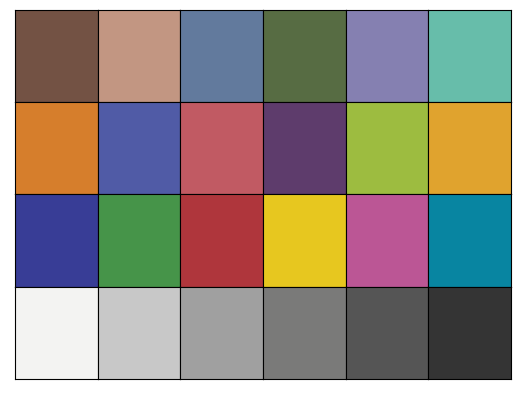

In [23]:
fig, ax = plt.subplots(4,6)
fig.subplots_adjust(wspace=0, hspace=0)

ax[0,0].yaxis.set_visible(False)
ax[0,0].xaxis.set_visible(False)
ax[0,0].set_facecolor('#735244')
ax[0,1].yaxis.set_visible(False)
ax[0,1].xaxis.set_visible(False)
ax[0,1].set_facecolor('#c29682')
ax[0,2].yaxis.set_visible(False)
ax[0,2].xaxis.set_visible(False)
ax[0,2].set_facecolor('#627a9d')
ax[0,3].yaxis.set_visible(False)
ax[0,3].xaxis.set_visible(False)
ax[0,3].set_facecolor('#576c43')
ax[0,4].yaxis.set_visible(False)
ax[0,4].xaxis.set_visible(False)
ax[0,4].set_facecolor('#8580b1')
ax[0,5].yaxis.set_visible(False)
ax[0,5].xaxis.set_visible(False)
ax[0,5].set_facecolor('#67bdaa')
ax[1,0].yaxis.set_visible(False)
ax[1,0].xaxis.set_visible(False)
ax[1,0].set_facecolor('#d67e2c')
ax[1,1].yaxis.set_visible(False)
ax[1,1].xaxis.set_visible(False)
ax[1,1].set_facecolor('#505ba6')
ax[1,2].yaxis.set_visible(False)
ax[1,2].xaxis.set_visible(False)
ax[1,2].set_facecolor('#c15a63')
ax[1,3].yaxis.set_visible(False)
ax[1,3].xaxis.set_visible(False)
ax[1,3].set_facecolor('#5e3c6c')
ax[1,4].yaxis.set_visible(False)
ax[1,4].xaxis.set_visible(False)
ax[1,4].set_facecolor('#9dbc40')
ax[1,5].yaxis.set_visible(False)
ax[1,5].xaxis.set_visible(False)
ax[1,5].set_facecolor('#e0a32e')
ax[2,0].yaxis.set_visible(False)
ax[2,0].xaxis.set_visible(False)
ax[2,0].set_facecolor('#383d96')
ax[2,1].yaxis.set_visible(False)
ax[2,1].xaxis.set_visible(False)
ax[2,1].set_facecolor('#469449')
ax[2,2].yaxis.set_visible(False)
ax[2,2].xaxis.set_visible(False)
ax[2,2].set_facecolor('#af363c')
ax[2,3].yaxis.set_visible(False)
ax[2,3].xaxis.set_visible(False)
ax[2,3].set_facecolor('#e7c71f')
ax[2,4].yaxis.set_visible(False)
ax[2,4].xaxis.set_visible(False)
ax[2,4].set_facecolor('#bb5695')
ax[2,5].yaxis.set_visible(False)
ax[2,5].xaxis.set_visible(False)
ax[2,5].set_facecolor('#0885a1')
ax[3,0].yaxis.set_visible(False)
ax[3,0].xaxis.set_visible(False)
ax[3,0].set_facecolor('#f3f3f2')
ax[3,1].yaxis.set_visible(False)
ax[3,1].xaxis.set_visible(False)
ax[3,1].set_facecolor('#c8c8c8')
ax[3,2].yaxis.set_visible(False)
ax[3,2].xaxis.set_visible(False)
ax[3,2].set_facecolor('#a0a0a0')
ax[3,3].yaxis.set_visible(False)
ax[3,3].xaxis.set_visible(False)
ax[3,3].set_facecolor('#7a7a79')
ax[3,4].yaxis.set_visible(False)
ax[3,4].xaxis.set_visible(False)
ax[3,4].set_facecolor('#555555')
ax[3,5].yaxis.set_visible(False)
ax[3,5].xaxis.set_visible(False)
ax[3,5].set_facecolor('#343434')

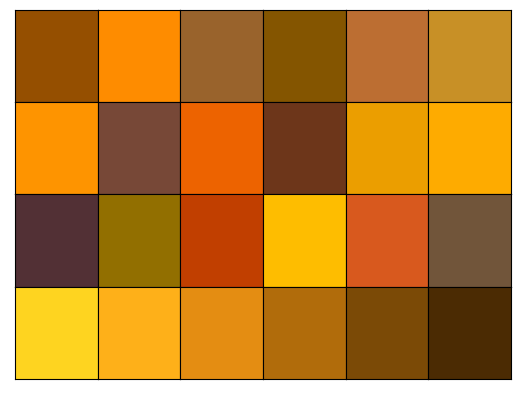

In [24]:
fig, ax = plt.subplots(4,6)
fig.subplots_adjust(wspace=0, hspace=0)

ax[0,0].yaxis.set_visible(False)
ax[0,0].xaxis.set_visible(False)
ax[0,0].set_facecolor(rgb[0])
ax[0,1].yaxis.set_visible(False)
ax[0,1].xaxis.set_visible(False)
ax[0,1].set_facecolor(rgb[1])
ax[0,2].yaxis.set_visible(False)
ax[0,2].xaxis.set_visible(False)
ax[0,2].set_facecolor(rgb[2])
ax[0,3].yaxis.set_visible(False)
ax[0,3].xaxis.set_visible(False)
ax[0,3].set_facecolor(rgb[3])
ax[0,4].yaxis.set_visible(False)
ax[0,4].xaxis.set_visible(False)
ax[0,4].set_facecolor(rgb[4])
ax[0,5].yaxis.set_visible(False)
ax[0,5].xaxis.set_visible(False)
ax[0,5].set_facecolor(rgb[5])
ax[1,0].yaxis.set_visible(False)
ax[1,0].xaxis.set_visible(False)
ax[1,0].set_facecolor(rgb[6])
ax[1,1].yaxis.set_visible(False)
ax[1,1].xaxis.set_visible(False)
ax[1,1].set_facecolor(rgb[7])
ax[1,2].yaxis.set_visible(False)
ax[1,2].xaxis.set_visible(False)
ax[1,2].set_facecolor(rgb[8])
ax[1,3].yaxis.set_visible(False)
ax[1,3].xaxis.set_visible(False)
ax[1,3].set_facecolor(rgb[9])
ax[1,4].yaxis.set_visible(False)
ax[1,4].xaxis.set_visible(False)
ax[1,4].set_facecolor(rgb[10])
ax[1,5].yaxis.set_visible(False)
ax[1,5].xaxis.set_visible(False)
ax[1,5].set_facecolor(rgb[11])
ax[2,0].yaxis.set_visible(False)
ax[2,0].xaxis.set_visible(False)
ax[2,0].set_facecolor(rgb[12])
ax[2,1].yaxis.set_visible(False)
ax[2,1].xaxis.set_visible(False)
ax[2,1].set_facecolor(rgb[13])
ax[2,2].yaxis.set_visible(False)
ax[2,2].xaxis.set_visible(False)
ax[2,2].set_facecolor(rgb[14])
ax[2,3].yaxis.set_visible(False)
ax[2,3].xaxis.set_visible(False)
ax[2,3].set_facecolor(rgb[15])
ax[2,4].yaxis.set_visible(False)
ax[2,4].xaxis.set_visible(False)
ax[2,4].set_facecolor(rgb[16])
ax[2,5].yaxis.set_visible(False)
ax[2,5].xaxis.set_visible(False)
ax[2,5].set_facecolor(rgb[17])
ax[3,0].yaxis.set_visible(False)
ax[3,0].xaxis.set_visible(False)
ax[3,0].set_facecolor(rgb[18])
ax[3,1].yaxis.set_visible(False)
ax[3,1].xaxis.set_visible(False)
ax[3,1].set_facecolor(rgb[19])
ax[3,2].yaxis.set_visible(False)
ax[3,2].xaxis.set_visible(False)
ax[3,2].set_facecolor(rgb[20])
ax[3,3].yaxis.set_visible(False)
ax[3,3].xaxis.set_visible(False)
ax[3,3].set_facecolor(rgb[21])
ax[3,4].yaxis.set_visible(False)
ax[3,4].xaxis.set_visible(False)
ax[3,4].set_facecolor(rgb[22])
ax[3,5].yaxis.set_visible(False)
ax[3,5].xaxis.set_visible(False)
ax[3,5].set_facecolor(rgb[23])

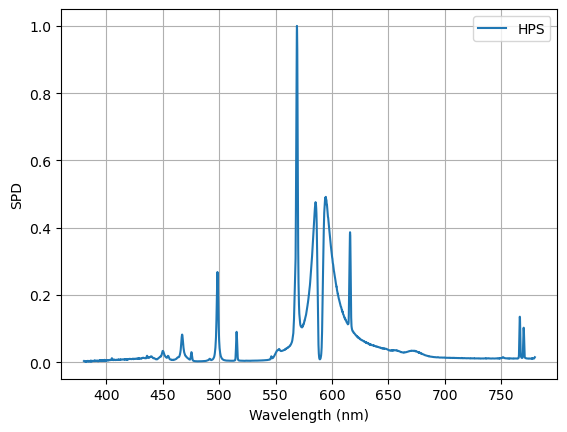

In [25]:
plt.plot(wavelength, light, label = 'HPS')
plt.ylabel('SPD')
plt.xlabel('Wavelength (nm)')
plt.legend()
plt.grid()
plt.show()